In [1]:
import itertools
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def triangle_info(G,code=0):
    tri_vertex = {}         # find the number the triangle uses the vertex
    tri_edge = {}           # binary combinations in triangle

    for node in G.nodes:
        tri_vertex[node] = 0.0   # Initialize for each vertex
        for nbr in G.neighbors(node):
            tri_edge[(node,nbr)] = 0.0    # Initialize for each edge, note each edge is tuple with lower vertex first
            tri_edge[(nbr,node)] = 0.0    # Initialize for each edge, note each edge is tuple with lower vertex first
    sum = 0
    for node1 in G.nodes:     # Loop over all nodes
        for (node2, node3) in itertools.combinations(G.neighbors(node1),2):    #Loop over all pairs of neighbors of node1
            if G.has_edge(node2,node3):    # If (node2, node3) form an edge
                tri_vertex[node1] += 1       # Increment all triangle counts
                tri_vertex[node2] += 1
                tri_vertex[node3] += 1
                tri_edge[(node1,node2)] += 1
                tri_edge[(node1,node3)] += 1
                tri_edge[(node2,node3)] += 1
                tri_edge[(node2,node1)] += 1
                tri_edge[(node3,node1)] += 1
                tri_edge[(node3,node2)] += 1
                sum+=1
    total = 0
    for node1 in G.nodes:
        total+= tri_vertex[node1]
    if code==1:
        print("number of triangle : ",sum/3)
    return [tri_vertex, tri_edge]


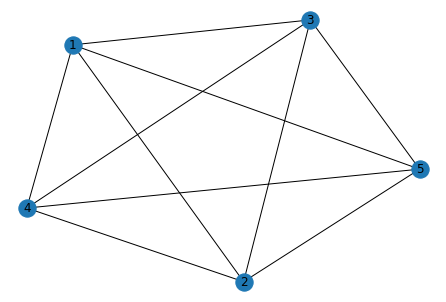

In [7]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(1,5)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(2,5)
G.add_edge(3,4)
G.add_edge(3,5)
G.add_edge(4,5)
nx.draw(G,with_labels=True)
plt.show()

In [10]:
triangle_info(G,1)

number of triangle :  10.0


[{1: 18.0, 2: 18.0, 3: 18.0, 4: 18.0, 5: 18.0},
 {(1, 2): 9.0,
  (2, 1): 9.0,
  (1, 3): 9.0,
  (3, 1): 9.0,
  (1, 4): 9.0,
  (4, 1): 9.0,
  (1, 5): 9.0,
  (5, 1): 9.0,
  (2, 3): 9.0,
  (3, 2): 9.0,
  (2, 4): 9.0,
  (4, 2): 9.0,
  (2, 5): 9.0,
  (5, 2): 9.0,
  (3, 4): 9.0,
  (4, 3): 9.0,
  (3, 5): 9.0,
  (5, 3): 9.0,
  (4, 5): 9.0,
  (5, 4): 9.0}]

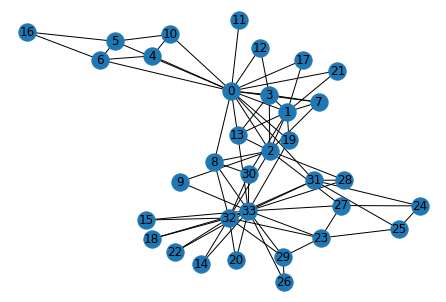

In [12]:
H = nx.karate_club_graph()
nx.draw(H,with_labels=True)
plt.show()

In [14]:
triangle_info(H,1)

number of triangle :  45.0


[{0: 54.0,
  1: 36.0,
  2: 33.0,
  3: 30.0,
  4: 6.0,
  5: 9.0,
  6: 9.0,
  7: 18.0,
  8: 15.0,
  9: 0.0,
  10: 6.0,
  11: 0.0,
  12: 3.0,
  13: 18.0,
  14: 3.0,
  15: 3.0,
  16: 3.0,
  17: 3.0,
  18: 3.0,
  19: 3.0,
  20: 3.0,
  21: 3.0,
  22: 3.0,
  23: 12.0,
  24: 3.0,
  25: 3.0,
  26: 3.0,
  27: 3.0,
  28: 3.0,
  29: 12.0,
  30: 9.0,
  31: 9.0,
  32: 39.0,
  33: 45.0},
 {(0, 1): 21.0,
  (1, 0): 21.0,
  (0, 2): 15.0,
  (2, 0): 15.0,
  (0, 3): 15.0,
  (3, 0): 15.0,
  (0, 4): 6.0,
  (4, 0): 6.0,
  (0, 5): 6.0,
  (5, 0): 6.0,
  (0, 6): 6.0,
  (6, 0): 6.0,
  (0, 7): 9.0,
  (7, 0): 9.0,
  (0, 8): 3.0,
  (8, 0): 3.0,
  (0, 10): 6.0,
  (10, 0): 6.0,
  (0, 11): 0.0,
  (11, 0): 0.0,
  (0, 12): 3.0,
  (12, 0): 3.0,
  (0, 13): 9.0,
  (13, 0): 9.0,
  (0, 17): 3.0,
  (17, 0): 3.0,
  (0, 19): 3.0,
  (19, 0): 3.0,
  (0, 21): 3.0,
  (21, 0): 3.0,
  (0, 31): 0.0,
  (31, 0): 0.0,
  (1, 2): 12.0,
  (2, 1): 12.0,
  (1, 3): 12.0,
  (3, 1): 12.0,
  (1, 7): 9.0,
  (7, 1): 9.0,
  (1, 13): 9.0,
  (13, 1): 9

In [23]:
nx.triangles(H)
sum = 0
for x in H.nodes:
    sum += nx.triangles(H)[x]
sum/3

45.0